# 1. Importing Libraries

In this section, we will import the libraries that we will use in this project. We will import the following libraries:

- numpy for numerical computing
- pandas for data manipulation
- matplotlib for plotting
- seaborn for plotting
- sklearn for machine learning
- scipy for scientific computing

In [647]:
# Imports
import numpy as np
import pandas as pd

import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Loading the Data

In this section, we will load the data that we will use in this project. We will load the data from the CSV files using the pandas library. We will load the data into a pandas DataFrame.

In [648]:
# Define path to data
file_path = "Data/"

# Load the data
crop_yield_df = pd.read_csv(file_path + "Crops production indicators - FAOSTAT_data_en_2-22-2024.csv")
fertiliser_use_df = pd.read_csv(file_path + "Fertilizers use - FAOSTAT_data_en_2-27-2024.csv")
land_temperature_change_df = pd.read_csv(file_path + "Land temperature change - FAOSTAT_data_en_2-27-2024.csv")
pesticides_use_df = pd.read_csv(file_path + "Pesticides use - FAOSTAT_data_en_2-27-2024.csv")
crop_value_df = pd.read_csv(file_path + "Food trade indicators - FAOSTAT_data_en_2-22-2024.csv")
land_use_df = pd.read_csv(file_path + "Land use - FAOSTAT_data_en_2-22-2024.csv")

C:\Users\tomna\AppData\Local\Temp\ipykernel_33504\4020878960.py:10: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  land_use_df = pd.read_csv(file_path + "Land use - FAOSTAT_data_en_2-22-2024.csv")


# 3. Data Preparation

In this section, we will prepare the data for analysis. For each of the dataframes, will perform the following steps:
- Explore the data
- Check for missing values
- Check for duplicate rows
- Drop unnecessary columns
- Group data if necessary to get totals and averages
- Rename value column to a more descriptive name for easier reference

## 3.1. Crop Yield Data

In [649]:
# Display the first few rows of the crop yield data
crop_yield_df.head()

# Check for missing values
crop_yield_df.isnull().sum()

# Check for duplicate rows
crop_yield_df.duplicated().sum()

# Drop unnecessary columns
crop_yield_df = crop_yield_df.drop(columns=["Domain", "Domain Code", "Element Code", "Element", "Year Code", "Unit", "Flag", "Flag Description", "Note", "Item Code (CPC)"])

#Display the first few rows of the crop yield data
crop_yield_df.head()

# Rename value column to yield in 100g/ha
crop_yield_df = crop_yield_df.rename(columns={"Value": "Yield in 100g/ha"})

## 3.2. Fertiliser Use Data

In [650]:
# Display the first few rows of the fertiliser use data
fertiliser_use_df.head()

# Check for missing values
fertiliser_use_df.isnull().sum()

# Check for duplicate rows
fertiliser_use_df.duplicated().sum()

# Drop unnecessary columns
fertiliser_use_df = fertiliser_use_df.drop(columns=["Domain", "Domain Code", "Element Code", "Element", "Year Code", "Unit", "Flag", "Flag Description", "Item Code", "Item"])

# Group data by country and year to get the total fertiliser use
fertiliser_use_df = fertiliser_use_df.groupby(["Area", "Year", "Area Code (M49)"]).sum().reset_index()

# Rename value column to total fertiliser use in tonnes
fertiliser_use_df = fertiliser_use_df.rename(columns={"Value": "Total Fertiliser Use in Tonnes"})

## 3.3. Land Temperature Change Data

In [651]:
# Display the first few rows of the land temperature change data
land_temperature_change_df.head()

# Filter land temperature change to get only meteorological year
land_temperature_change_df = land_temperature_change_df[land_temperature_change_df["Months"] == "Meteorological year"]

# Split df into two dataframes: one for temperature change and one for standard deviation
land_temperature_change_df = land_temperature_change_df[land_temperature_change_df["Element"] == "Temperature change"]
land_temperature_change_std_df = land_temperature_change_df[land_temperature_change_df["Element"] == "Standard Deviation"]

# Drop unnecessary columns
land_temperature_change_df = land_temperature_change_df.drop(columns=["Domain", "Domain Code", "Element Code", "Element", "Year Code", "Unit", "Flag", "Flag Description", "Months", "Months Code"])

# If all values for the country are missing, drop the country
land_temperature_change_df = land_temperature_change_df.groupby('Area').filter(lambda x: x[['Value']].notna().any().any())

# Impute missing values with the mean for the country
land_temperature_change_df['Value'] = land_temperature_change_df.groupby('Area',)['Value'].transform(lambda x: x.fillna(x.mean()))

# Check for missing values
land_temperature_change_df.isnull().sum()

# Check for duplicate rows
land_temperature_change_df.duplicated().sum()

# Rename value column to temperature change in degrees celsius
land_temperature_change_df = land_temperature_change_df.rename(columns={"Value": "Temperature Change in Degrees Celsius"})

## 3.4. Pesticides Use Data

In [652]:
# Display the first few rows of the pesticides use data
pesticides_use_df.head()

# Get only the total pesticides used and only Agricultural Use
pesticides_use_df = pesticides_use_df[(pesticides_use_df["Item Code"] == 1357) & (pesticides_use_df["Element"] == "Agricultural Use")]
# Drop unnecessary columns
pesticides_use_df = pesticides_use_df.drop(columns=["Domain", "Domain Code", "Element Code", "Year Code", "Flag", "Flag Description", "Item Code", "Item", "Note", "Unit", "Element"])

# Check for missing values
pesticides_use_df.isnull().sum()

# Check for duplicate rows
pesticides_use_df.duplicated().sum()


# Rename value column to total pesticides use in tonnes
pesticides_use_df = pesticides_use_df.rename(columns={"Value": "Total Pesticides Use in Tonnes"})

pesticides_use_df.head()

,Area Code (M49),Area,Year,Total Pesticides Use in Tonnes
0,8,Albania,2000,307.98
3,8,Albania,2001,319.38
6,8,Albania,2002,330.78
9,8,Albania,2003,342.17
12,8,Albania,2004,353.57


## 3.5. Crop Value Data

In [653]:
# Display the first few rows of the crop value data
crop_value_df.head()

# Drop unnecessary columns
crop_value_df = crop_value_df.drop(columns=["Domain", "Domain Code",  "Year Code", "Flag", "Flag Description", "Note", "Unit", "Item Code (CPC)"])

# Check for missing values
crop_value_df.isnull().sum()

# Split the data into two dataframes: one for imports and one for exports
crop_value_imports_df = crop_value_df[crop_value_df["Element"] == "Import Value"]
crop_value_exports_df = crop_value_df[crop_value_df["Element"] == "Export Value"]

# Drop unnecessary columns
crop_value_imports_df = crop_value_imports_df.drop(columns=["Element", "Element Code"])
crop_value_exports_df = crop_value_exports_df.drop(columns=["Element", "Element Code"])

# Rename value column to crop value in 1000 US$
crop_value_imports_df = crop_value_imports_df.rename(columns={"Value": "Total Import Crop Value in 1000 US$"})
crop_value_exports_df = crop_value_exports_df.rename(columns={"Value": "Total Export Crop Value in 1000 US$"})

## 3.6. Land Use Data

In [654]:
# Display the first few rows of the land use data
land_use_df.head()

# Filter to select only agricultural land
land_use_df = land_use_df[land_use_df["Item"] == "Agricultural land"]
# Drop unnecessary columns
land_use_df = land_use_df.drop(columns=["Domain", "Domain Code", "Year Code", "Flag", "Flag Description", "Note", "Element", "Element Code", "Item Code", "Item", "Unit"])

# Check for missing values
land_use_df.isnull().sum()

# Check for duplicate rows
land_use_df.duplicated().sum()

# Rename value column to agricultural land in hectares
land_use_df = land_use_df.rename(columns={"Value": "Agricultural Land in Hectares"})

# 3.7. Merging Data

In this section, I will merge all the dataframes into a single dataframe.


### Standardising Items
Combine different items so that they match across datasets, combining them to make a harmonised dataset.

*Cereals and Grains:*
Crops Production: "Cereals, primary"
Food Trade: "Cereals and Preparations"

*Roots and Tubers:*
Crops Production: "Roots and Tubers, Total"

*Sugar and Sweeteners:*
Crops Production: "Sugar Crops Primary"
Food Trade: "Sugar and Honey"

*Pulses and Legumes:*
Crops Production: "Pulses, Total"

*Nuts and Oilseeds:*
Crops Production: "Oilcrops, Cake Equivalent", "Oilcrops, Oil Equivalent", "Treenuts, Total"
Food Trade: "Fats and Oils (excluding Butter)"

*Fruits and Vegetables:*
Crops Production: "Citrus Fruit, Total", "Fruit Primary", "Vegetables Primary"
Food Trade: "Fruit and Vegetables"

*Beverages and Alcoholic Products:*
Food Trade: "Alcoholic Beverages", "Non-alcoholic Beverages"

*Animal Products:*
Food Trade: "Meat and Meat Preparations", "Dairy Products and Eggs"

*Miscellaneous:*
Food Trade: "Other food", "Non-food", "Non-edible Fats and Oils", "Tobacco"

*Fibre and Textile Crops:*
Crops Production: "Fibre Crops, Fibre Equivalent"

In [655]:
# Views the unique items in the 'Item' column of the datasets
print("Unique Items in Crops Production Indicators:\n", crop_yield_df['Item'].unique())
print("Unique Items in Food Trade Indicators:\n", crop_value_exports_df['Item'].unique())

# Create dictionaries to map the items to their respective categories
crops_production_mapping = {
    'Cereals, primary': 'Cereals and Grains',
    'Roots and Tubers, Total': 'Roots and Tubers',
    'Sugar Crops Primary': 'Sugar and Sweeteners',
    'Pulses, Total': 'Pulses and Legumes',
    'Oilcrops, Cake Equivalent': 'Nuts and Oilseeds',
    'Oilcrops, Oil Equivalent': 'Nuts and Oilseeds',
    'Treenuts, Total': 'Nuts and Oilseeds',
    'Vegetables Primary': 'Fruits and Vegetables',
    'Citrus Fruit, Total': 'Fruits and Vegetables',
    'Fruit Primary': 'Fruits and Vegetables',
    'Fibre Crops, Fibre Equivalent': 'Fibre and Textile Crops',
}

food_trade_mapping = {
    'Cereals and Preparations': 'Cereals and Grains',
    'Fats and Oils (excluding Butter)': 'Nuts and Oilseeds',
    'Meat and Meat Preparations': 'Animal Products',
    'Sugar and Honey': 'Sugar and Sweeteners',
    'Fruit and Vegetables': 'Fruits and Vegetables',
    'Dairy Products and Eggs': 'Animal Products',
    'Alcoholic Beverages': 'Beverages and Alcoholic Products',
    'Non-alcoholic Beverages': 'Beverages and Alcoholic Products',
    'Other food': 'Miscellaneous',
    'Non-food': 'Miscellaneous',
    'Non-edible Fats and Oils': 'Miscellaneous',
    'Tobacco': 'Miscellaneous',
}

# Adds a Harmonised Item column to the datasets with the mapped items
crop_yield_df['Harmonised Item'] = crop_yield_df['Item'].map(crops_production_mapping)
crop_value_exports_df['Harmonised Item'] = crop_value_exports_df['Item'].map(food_trade_mapping)
crop_value_imports_df['Harmonised Item'] = crop_value_imports_df['Item'].map(food_trade_mapping)

# Drops unnecessary columns
crop_yield_df = crop_yield_df.drop(columns=['Item'])
crop_value_exports_df = crop_value_exports_df.drop(columns=['Item'])
crop_value_imports_df = crop_value_imports_df.drop(columns=['Item'])

Unique Items in Crops Production Indicators:
 ['Cereals, primary' 'Citrus Fruit, Total' 'Fibre Crops, Fibre Equivalent'
 'Fruit Primary' 'Oilcrops, Cake Equivalent' 'Oilcrops, Oil Equivalent'
 'Pulses, Total' 'Roots and Tubers, Total' 'Sugar Crops Primary'
 'Treenuts, Total' 'Vegetables Primary']
Unique Items in Food Trade Indicators:
 ['Cereals and Preparations' 'Fats and Oils (excluding Butter)'
 'Meat and Meat Preparations' 'Sugar and Honey' 'Fruit and Vegetables'
 'Dairy Products and Eggs' 'Alcoholic Beverages' 'Non-alcoholic Beverages'
 'Other food' 'Non-food' 'Non-edible Fats and Oils' 'Tobacco']


### 3.7.2 Merging Data

In this section, I will merge all the dataframes into a single dataframe. I will merge the dataframes on the following columns:
- Area
- Area Code (M49)
- Year
- Harmonised Item (for Crop Yield and Crop Value Data)

In [656]:
# Merge all the dataframes into a single dataframe
merged_df = crop_yield_df.merge(crop_value_exports_df, how="inner", left_on=["Area", "Year", "Area Code (M49)", 'Harmonised Item'], right_on=["Area", "Year", "Area Code (M49)", 'Harmonised Item'])
merged_df = merged_df.merge(crop_value_imports_df, how="inner", left_on=["Area", "Year", "Area Code (M49)", 'Harmonised Item'], right_on=["Area", "Year", "Area Code (M49)", 'Harmonised Item'])
merged_df.head()
merged_df = merged_df.merge(land_temperature_change_df, how="inner", left_on=["Area", "Year", "Area Code (M49)"], right_on=["Area", "Year", "Area Code (M49)"])
merged_df = merged_df.merge(pesticides_use_df, how="inner", left_on=["Area", "Year", "Area Code (M49)"], right_on=["Area", "Year", "Area Code (M49)"])
merged_df = merged_df.merge(land_use_df, how="inner", left_on=["Area", "Year", "Area Code (M49)"], right_on=["Area", "Year", "Area Code (M49)"])

In [657]:
# Describe the merged dataframe
merged_df.describe()

,Area Code (M49),Year,Yield in 100g/ha,Total Export Crop Value in 1000 US$,Total Import Crop Value in 1000 US$,Temperature Change in Degrees Celsius,Total Pesticides Use in Tonnes,Agricultural Land in Hectares
count,26785.000000,26785.000000,2.678500e+04,2.678500e+04,2.678500e+04,26785.000000,26785.000000,26785.000000
mean,419.253313,2010.447564,1.216748e+05,7.510800e+05,7.485436e+05,1.051572,20389.551909,32452.641948
std,252.477841,6.305532,1.911779e+05,2.571975e+06,2.357852e+06,0.517764,63791.408503,81910.137800
min,8.000000,2000.000000,0.000000e+00,0.000000e+00,0.000000e+00,-0.718000,0.070000,1.500000
25%,192.000000,2005.000000,9.514000e+03,2.445950e+03,2.779400e+04,0.696000,357.870000,1262.000000
50%,410.000000,2010.000000,4.696000e+04,4.072100e+04,1.103903e+05,0.998000,1836.200000,5073.000000
75%,642.000000,2016.000000,1.396940e+05,2.940840e+05,4.542440e+05,1.356000,9696.940000,25803.000000
max,894.000000,2021.000000,1.359231e+06,3.526993e+07,4.704264e+07,3.691000,719507.440000,529038.600000


In [658]:
# Show the shape of the merged dataframe (26785, 10)
merged_df.shape

(26785, 10)

In [659]:
# Count the number of countries in the merged dataframe (186)
merged_df['Area'].nunique()

186

In [660]:
# Count number of years in the merged dataframe (22)
merged_df['Year'].nunique()

22

# 4. Exploratory Data Analysis 

## 4.1 Crop Yield Analysis

In this section, we will perform exploratory data analysis on the crop yield data. We will explore the following:
- Mean crop yield over the years for all countries by crop type
- Total crop yield over the years for all countries by crop type

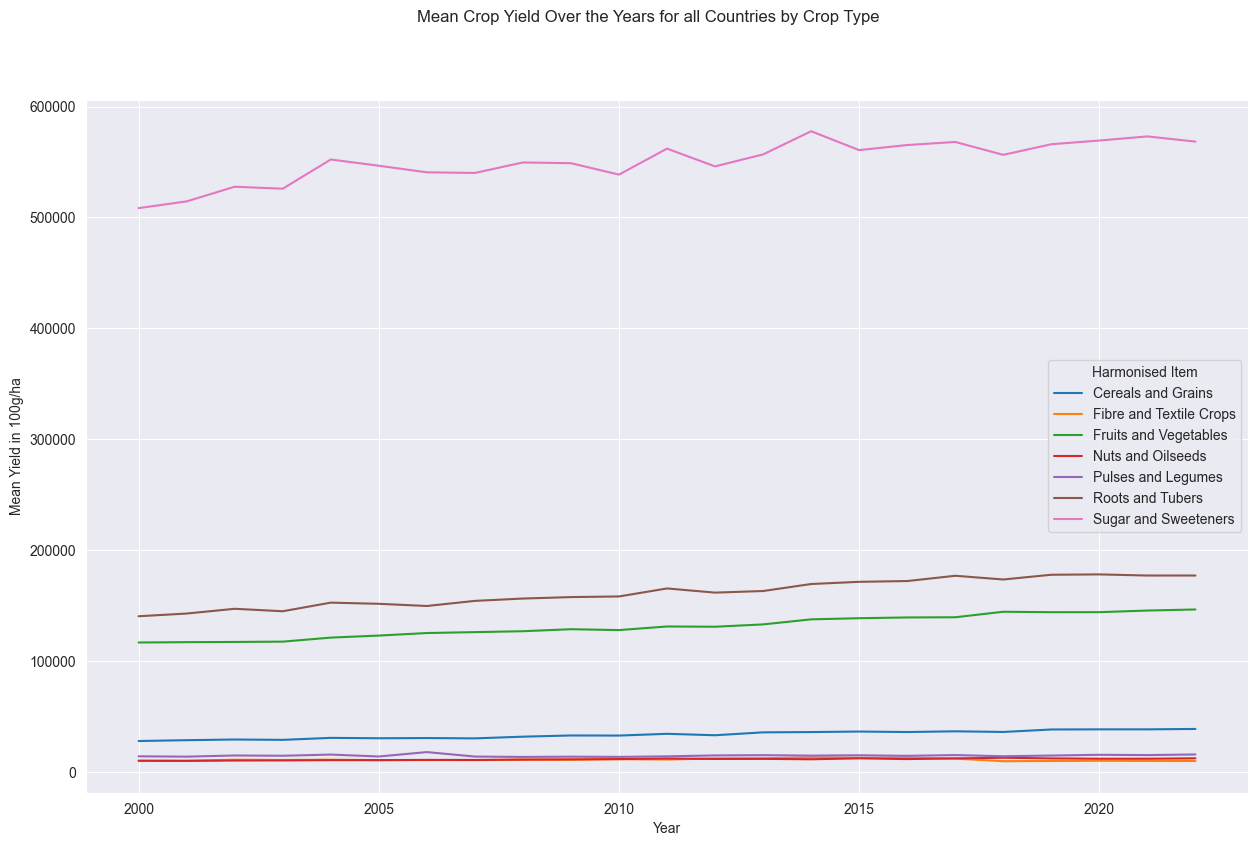

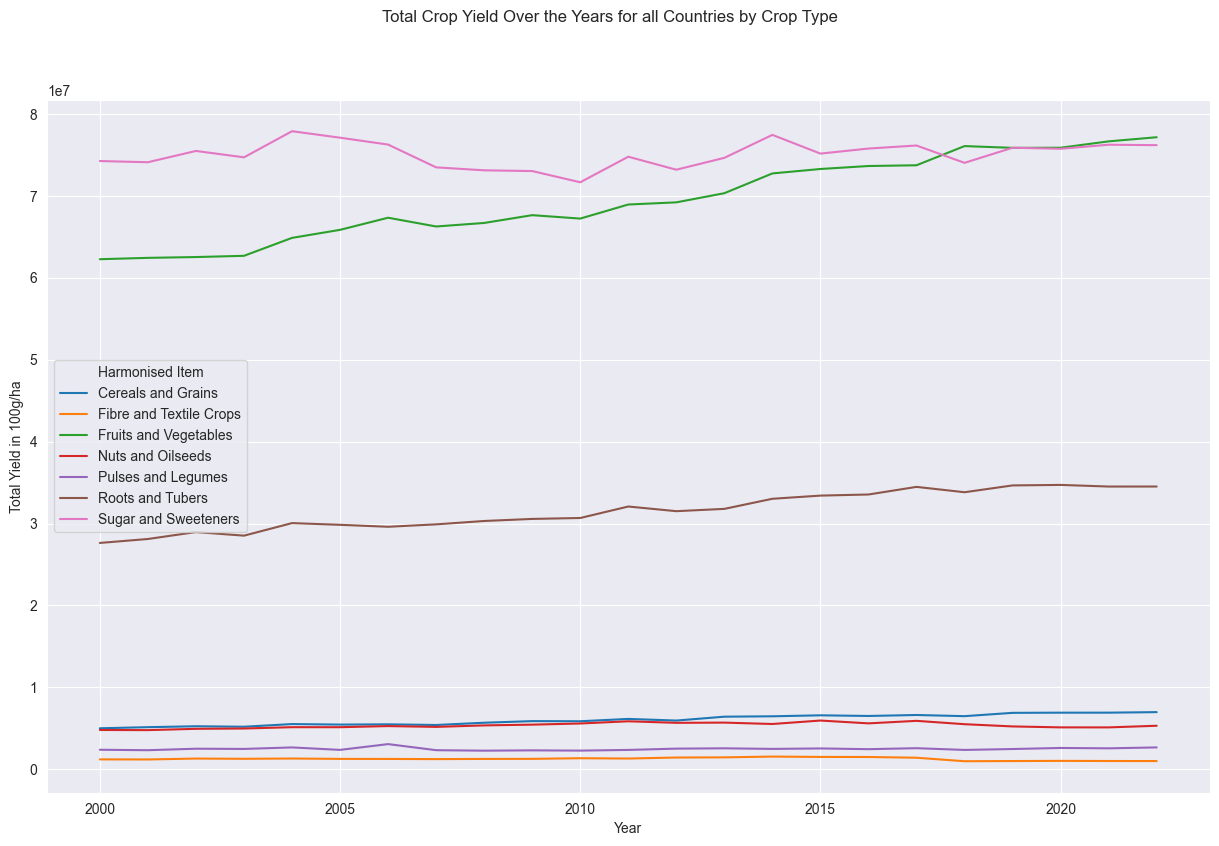

In [661]:
# # Prepare the data for analysis
crop_yield_mean = crop_yield_df.groupby(['Year', 'Harmonised Item'])['Yield in 100g/ha'].mean()
crop_yield_total = crop_yield_df.groupby(['Year', 'Harmonised Item'])['Yield in 100g/ha'].sum()

# Plot the mean crop yield over the years
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Mean Crop Yield Over the Years for all Countries by Crop Type")

crop_yield_mean.unstack().plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Yield in 100g/ha")

plt.show()

# Plot the total crop yield over the years
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Total Crop Yield Over the Years for all Countries by Crop Type")

crop_yield_total.unstack().plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Total Yield in 100g/ha")

plt.show()

## 4.2 Fertiliser Use Analysis

In this section, we will perform exploratory data analysis on the fertiliser use data. We will explore the following:
- Mean fertiliser use over the years for all countries
- Total fertiliser use over the years for all countries

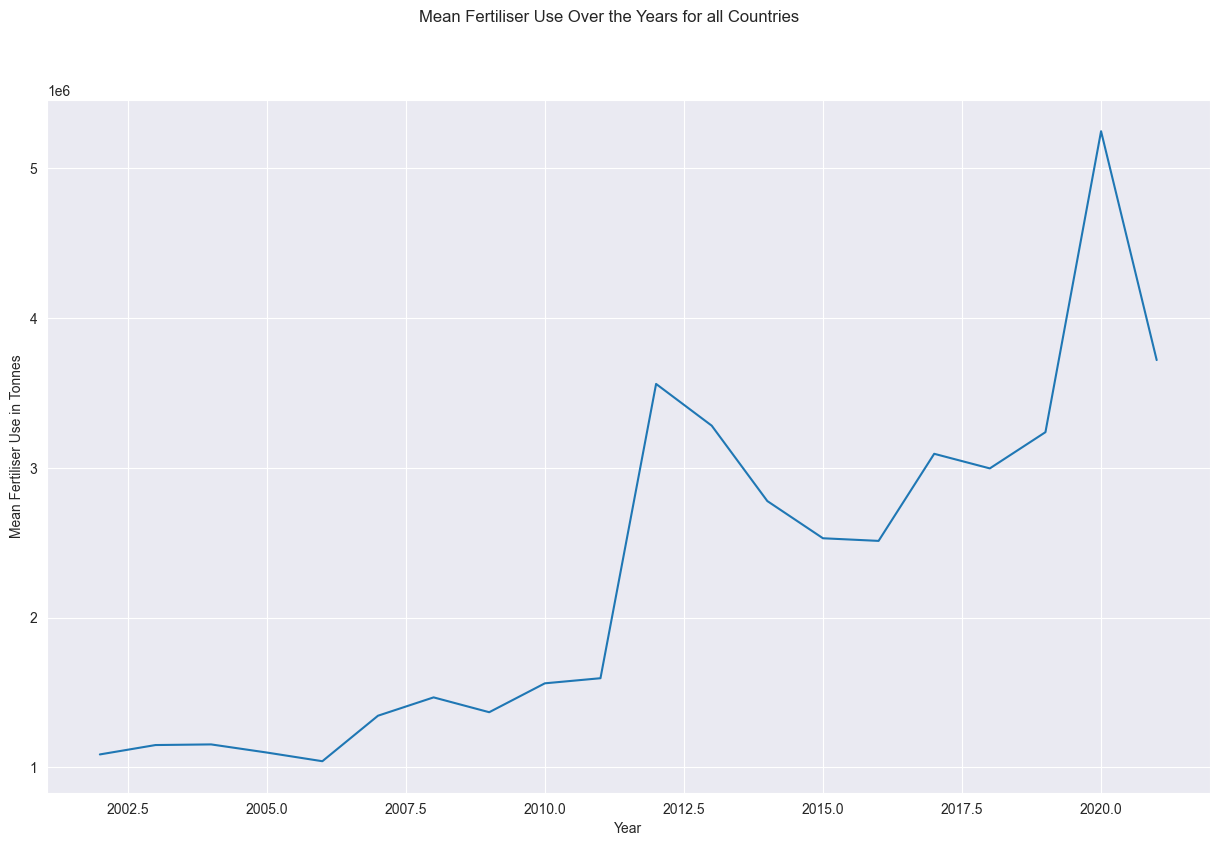

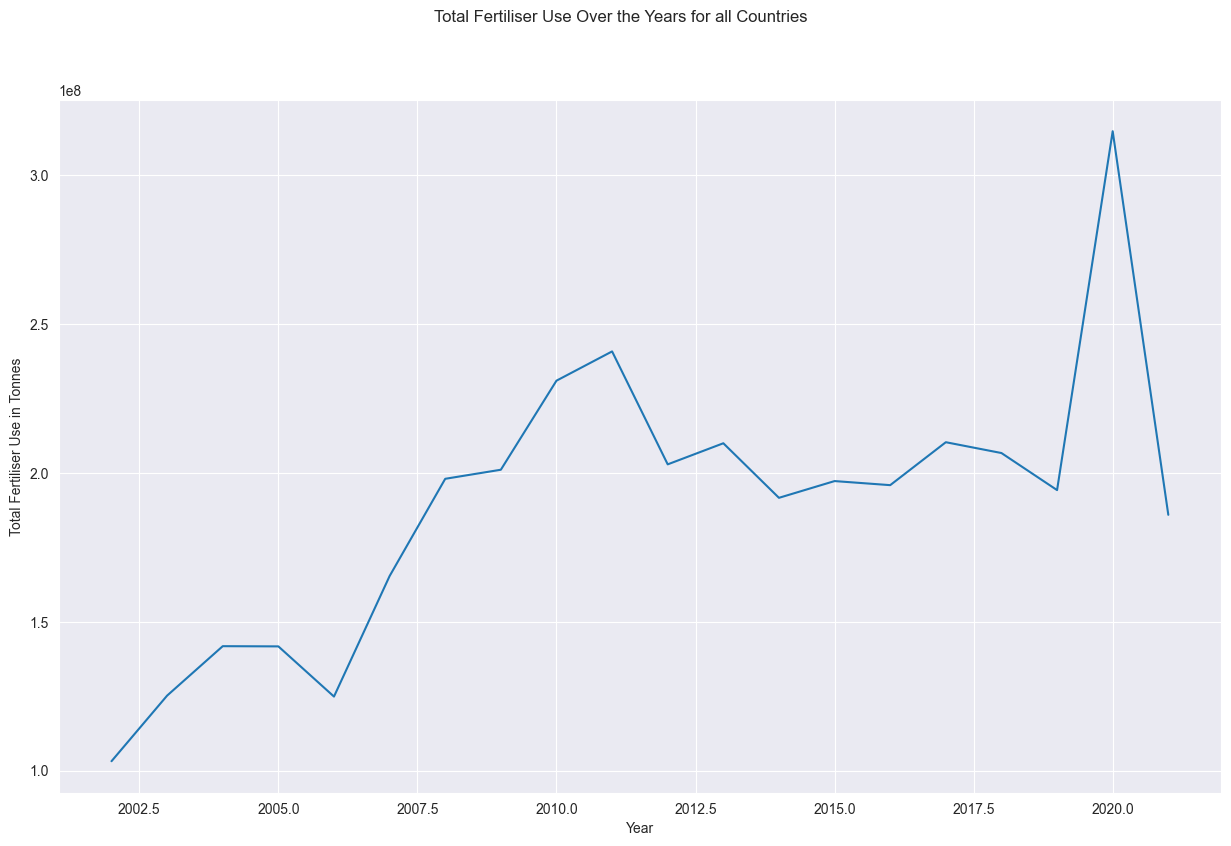

In [662]:
# Prepare the data for analysis
fertiliser_use_mean = fertiliser_use_df.groupby('Year')['Total Fertiliser Use in Tonnes'].mean()
fertiliser_use_total = fertiliser_use_df.groupby('Year')['Total Fertiliser Use in Tonnes'].sum()

# Plot the mean fertiliser use over the years
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Mean Fertiliser Use Over the Years for all Countries")

fertiliser_use_mean.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Fertiliser Use in Tonnes")

plt.show()

# Plot the total fertiliser use over the years
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Total Fertiliser Use Over the Years for all Countries")

fertiliser_use_total.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Total Fertiliser Use in Tonnes")

plt.show()

## 4.3 Land Temperature Change Analysis

In this section, we will perform exploratory data analysis on the land temperature change data. We will explore the following:
- Mean land temperature change over the years for all countries
- Land temperature change distribution
- Land temperature change correlation with crop yield

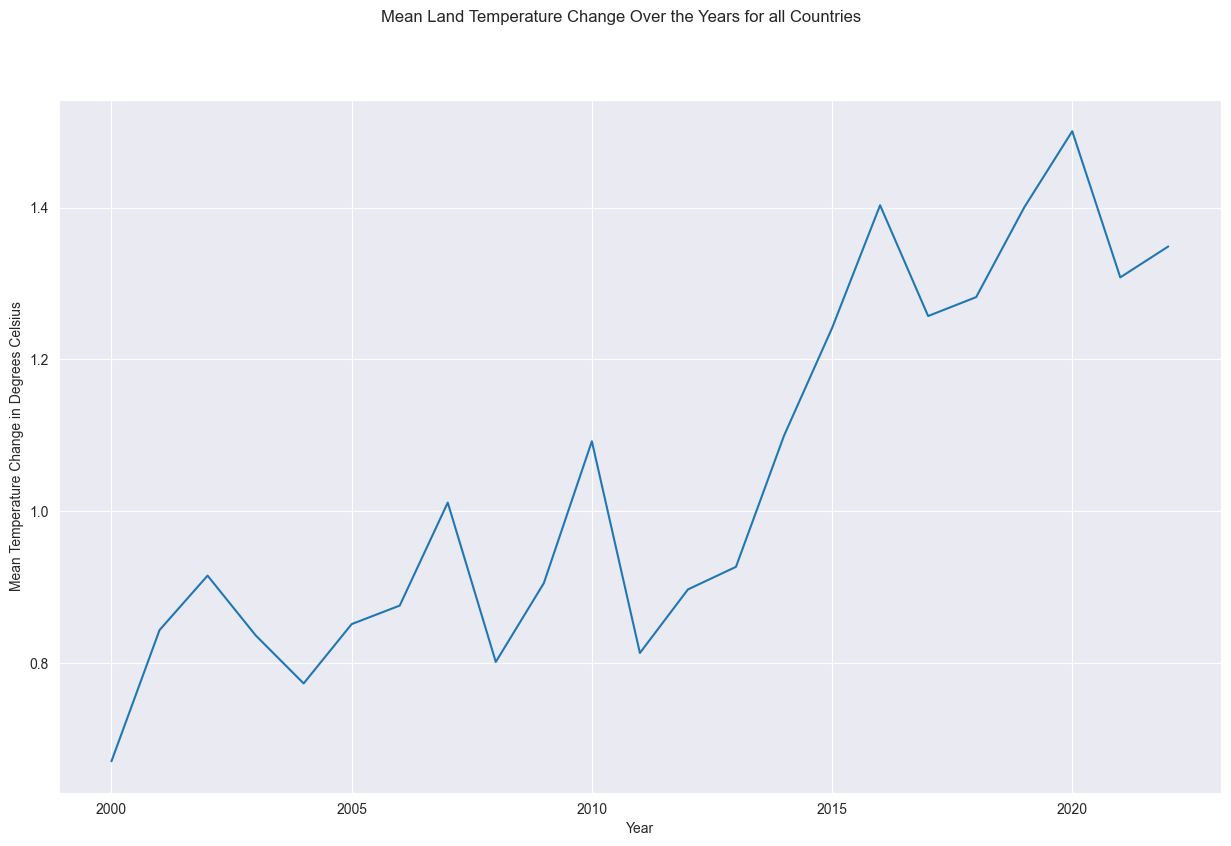

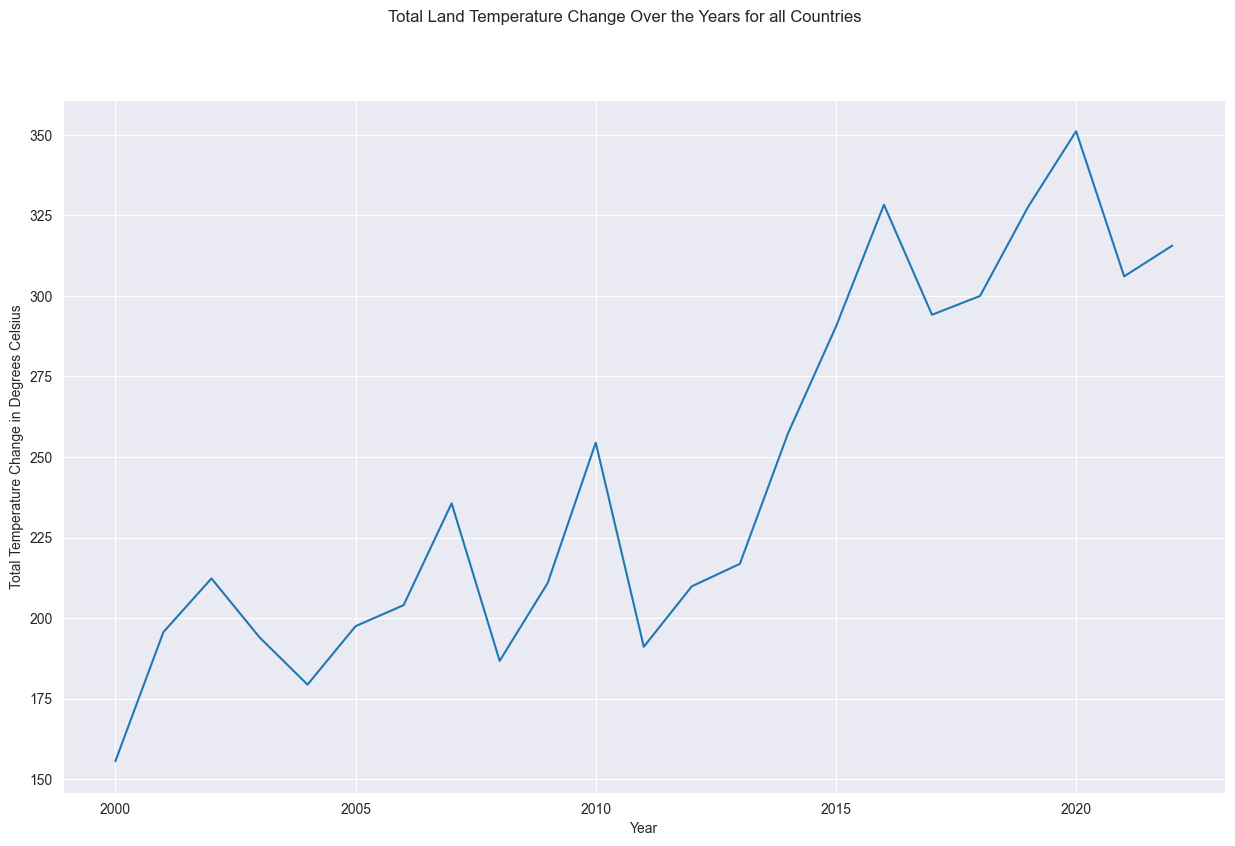

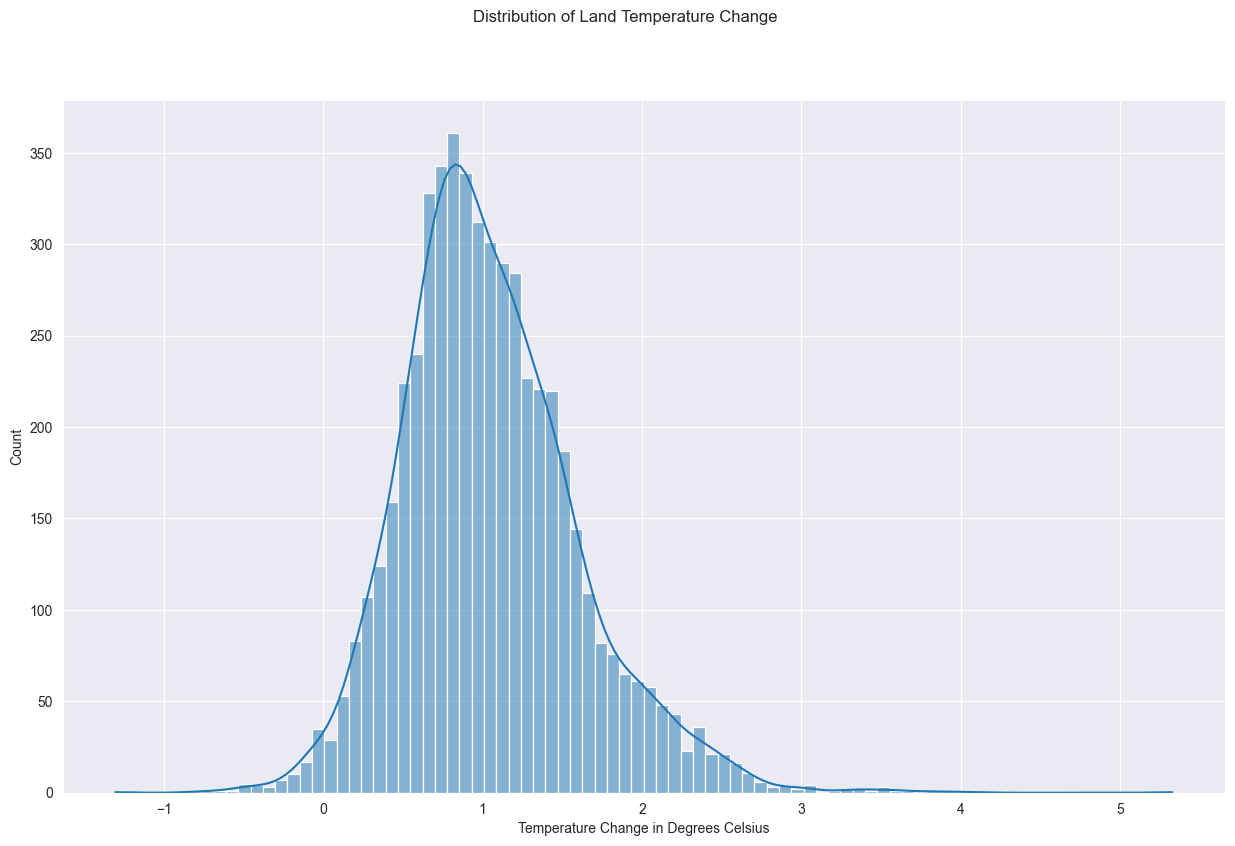

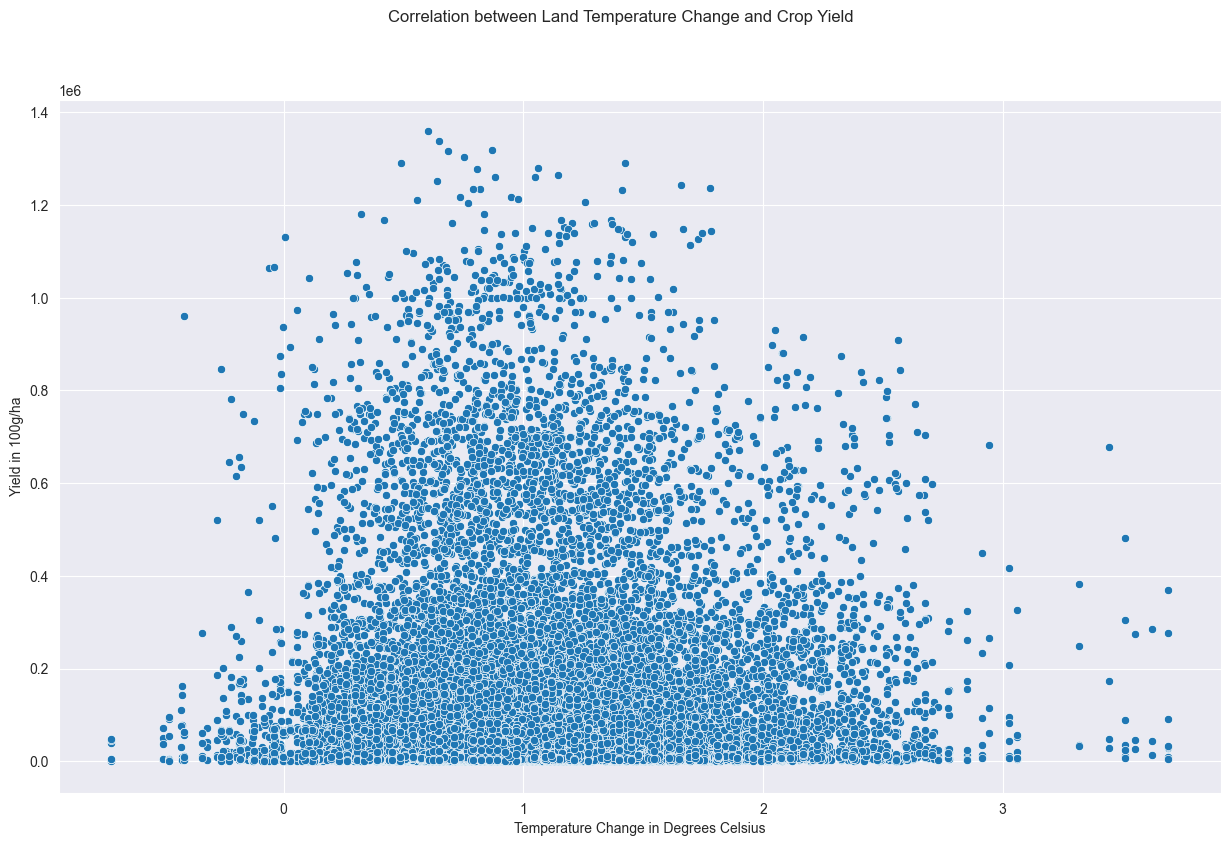

In [663]:
# Prepare the data for analysis
land_temperature_change_mean = land_temperature_change_df.groupby('Year')['Temperature Change in Degrees Celsius'].mean()
land_temperature_change_total = land_temperature_change_df.groupby('Year')['Temperature Change in Degrees Celsius'].sum()

# Plot the mean land temperature change over the years
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Mean Land Temperature Change Over the Years for all Countries")

land_temperature_change_mean.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Temperature Change in Degrees Celsius")

plt.show()

# Plot the total land temperature change over the years
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Total Land Temperature Change Over the Years for all Countries")

land_temperature_change_total.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Total Temperature Change in Degrees Celsius")

plt.show()

# Plot the distribution of land temperature change
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Distribution of Land Temperature Change")

sns.histplot(land_temperature_change_df['Temperature Change in Degrees Celsius'], kde=True, ax=ax)
plt.xlabel("Temperature Change in Degrees Celsius")

plt.show()

# Plot the correlation between land temperature change and crop yield
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Correlation between Land Temperature Change and Crop Yield")

sns.scatterplot(data=merged_df, x='Temperature Change in Degrees Celsius', y='Yield in 100g/ha', ax=ax)
plt.xlabel("Temperature Change in Degrees Celsius")
plt.ylabel("Yield in 100g/ha")

plt.show()

## 4.4 Pesticides Use Analysis

In this section, we will perform exploratory data analysis on the pesticides use data. We will explore the following:
- Mean pesticides use over the years for all countries
- Distribution of pesticides use
- Pesticides use correlation with crop yield

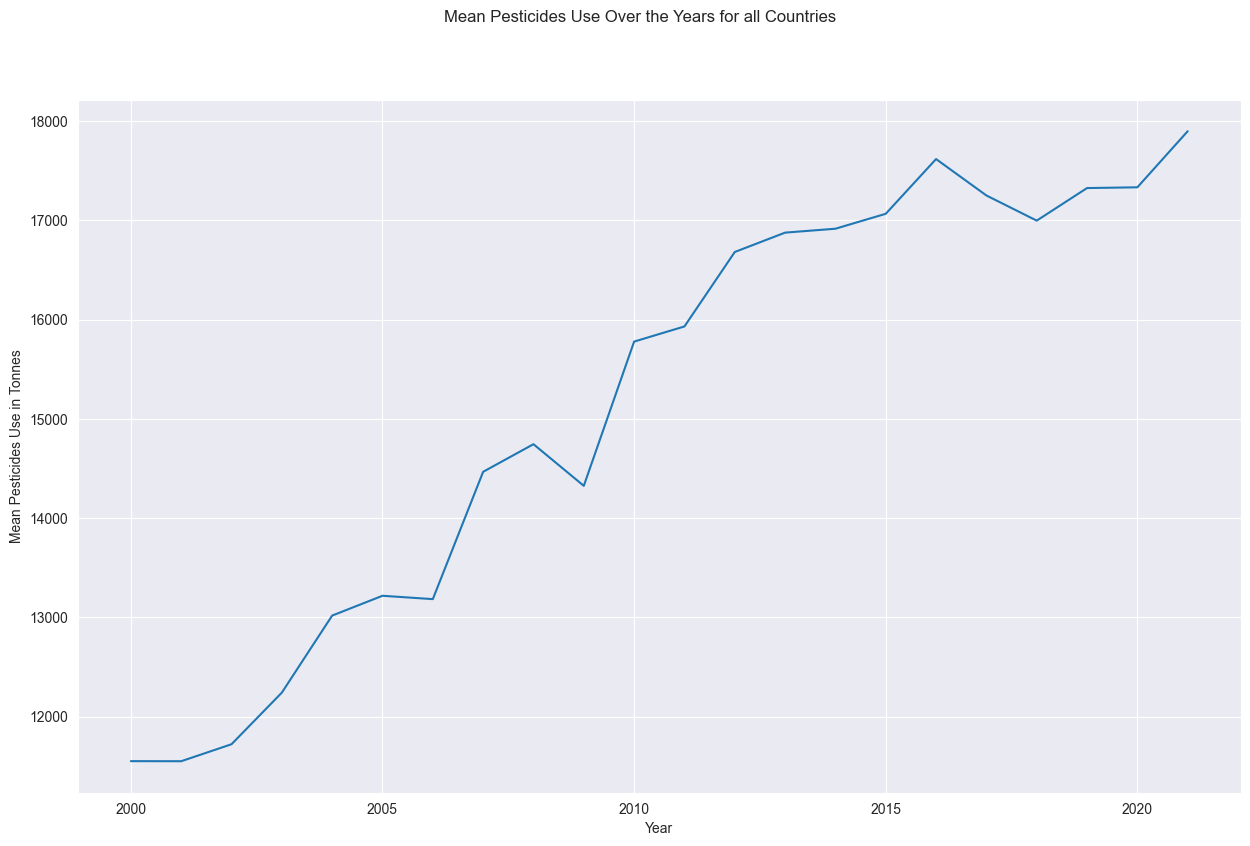

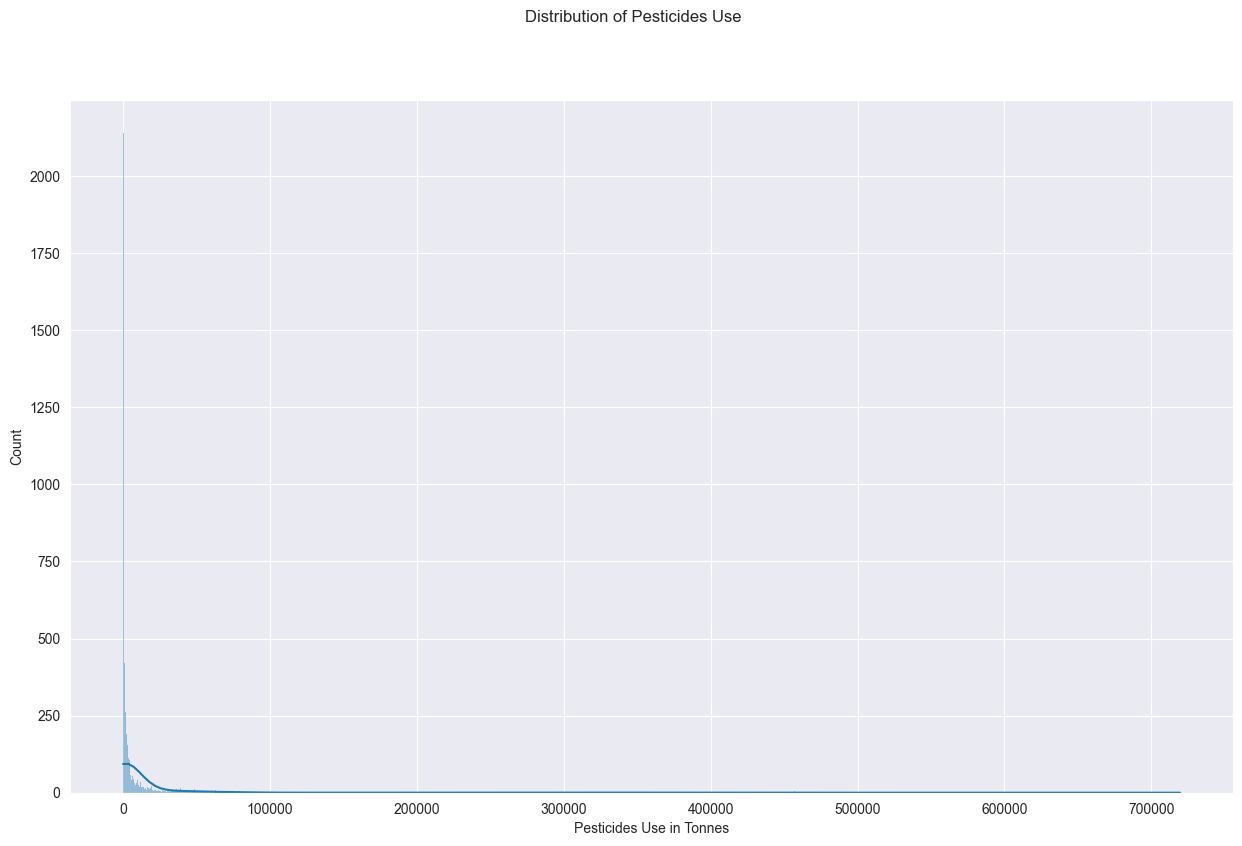

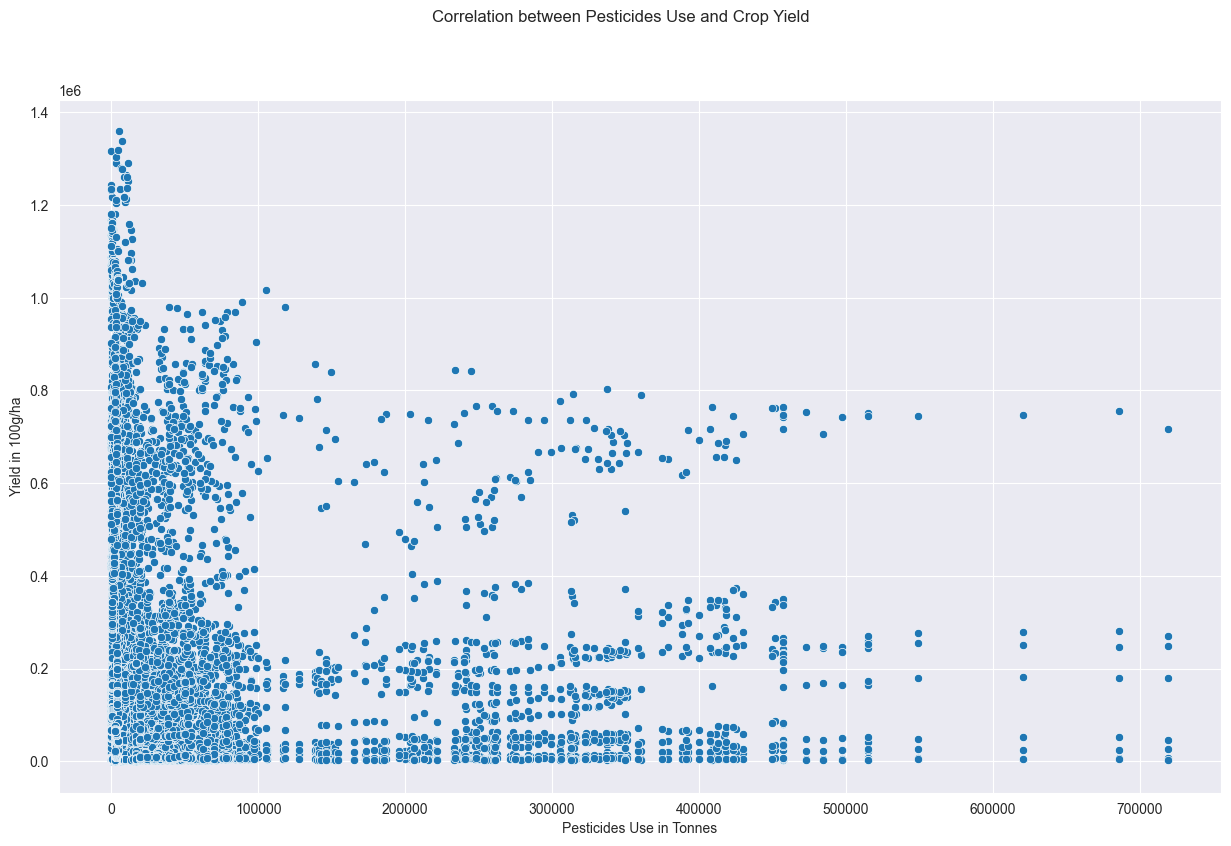

In [664]:
# Prepare the data for analysis
pesticides_use_mean = pesticides_use_df.groupby('Year')['Total Pesticides Use in Tonnes'].mean()
pesticides_use_total = pesticides_use_df.groupby('Year')['Total Pesticides Use in Tonnes'].sum()

# Plot the mean pesticides use over the years
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Mean Pesticides Use Over the Years for all Countries")

pesticides_use_mean.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Pesticides Use in Tonnes")

plt.show()

# Plot the distribution of pesticides use
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Distribution of Pesticides Use")

sns.histplot(pesticides_use_df['Total Pesticides Use in Tonnes'], kde=True, ax=ax)
plt.xlabel("Pesticides Use in Tonnes")

plt.show()

# Plot the correlation between pesticides use and crop yield
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Correlation between Pesticides Use and Crop Yield")

sns.scatterplot(data=merged_df, x='Total Pesticides Use in Tonnes', y='Yield in 100g/ha', ax=ax)
plt.xlabel("Pesticides Use in Tonnes")
plt.ylabel("Yield in 100g/ha")

plt.show()

### 4.5 Crop Value Analysis

In this section, we will perform exploratory data analysis on the crop value data (both import and export). We will explore the following:
- Mean crop value over the years for all countries by crop type
- Distribution of crop value
- Crop value correlation with crop yield

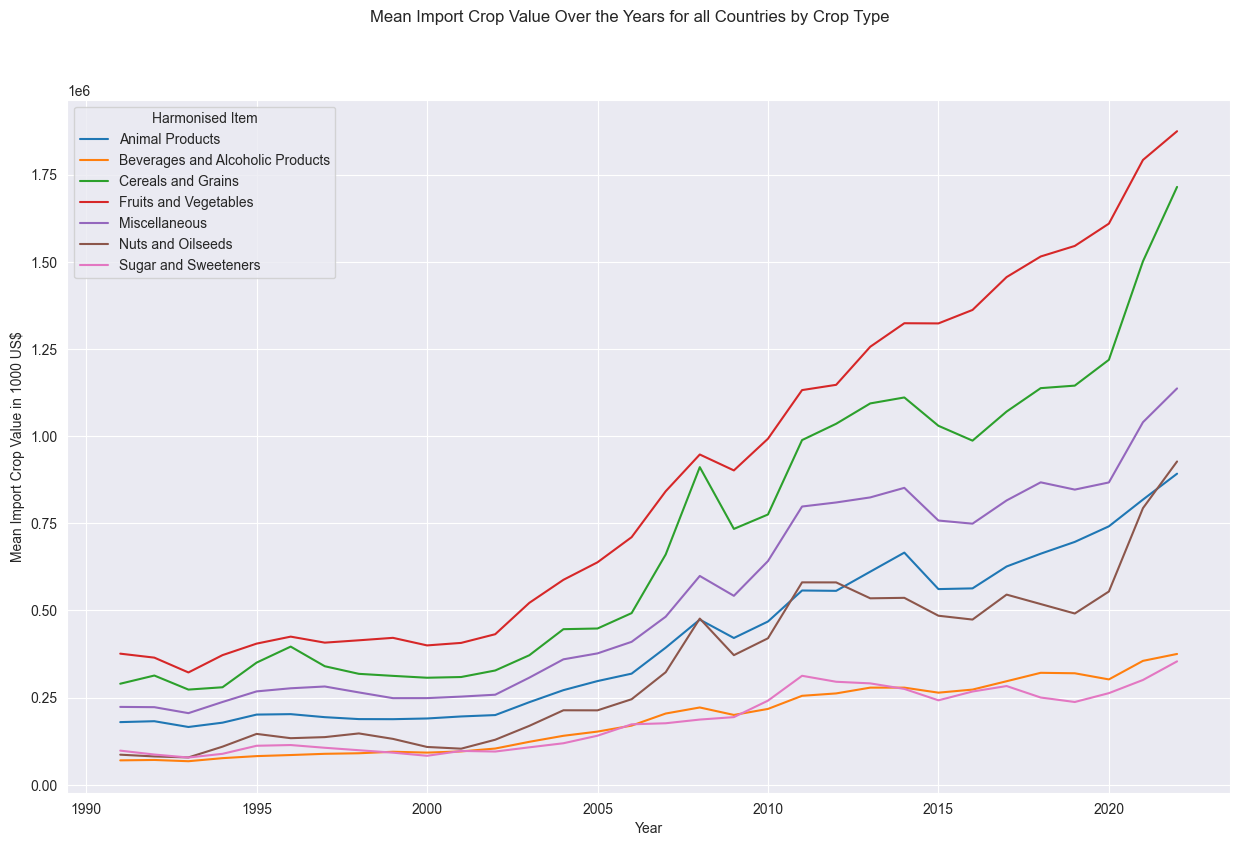

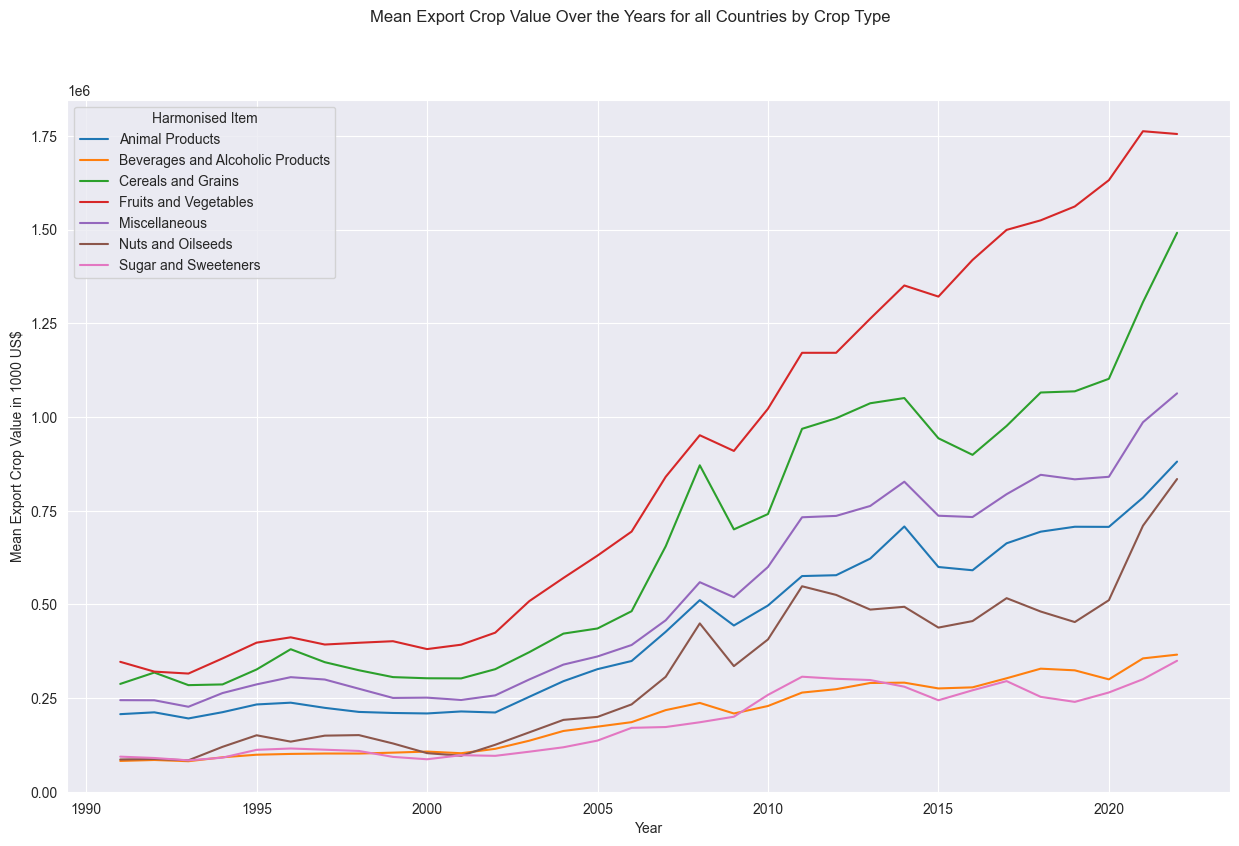

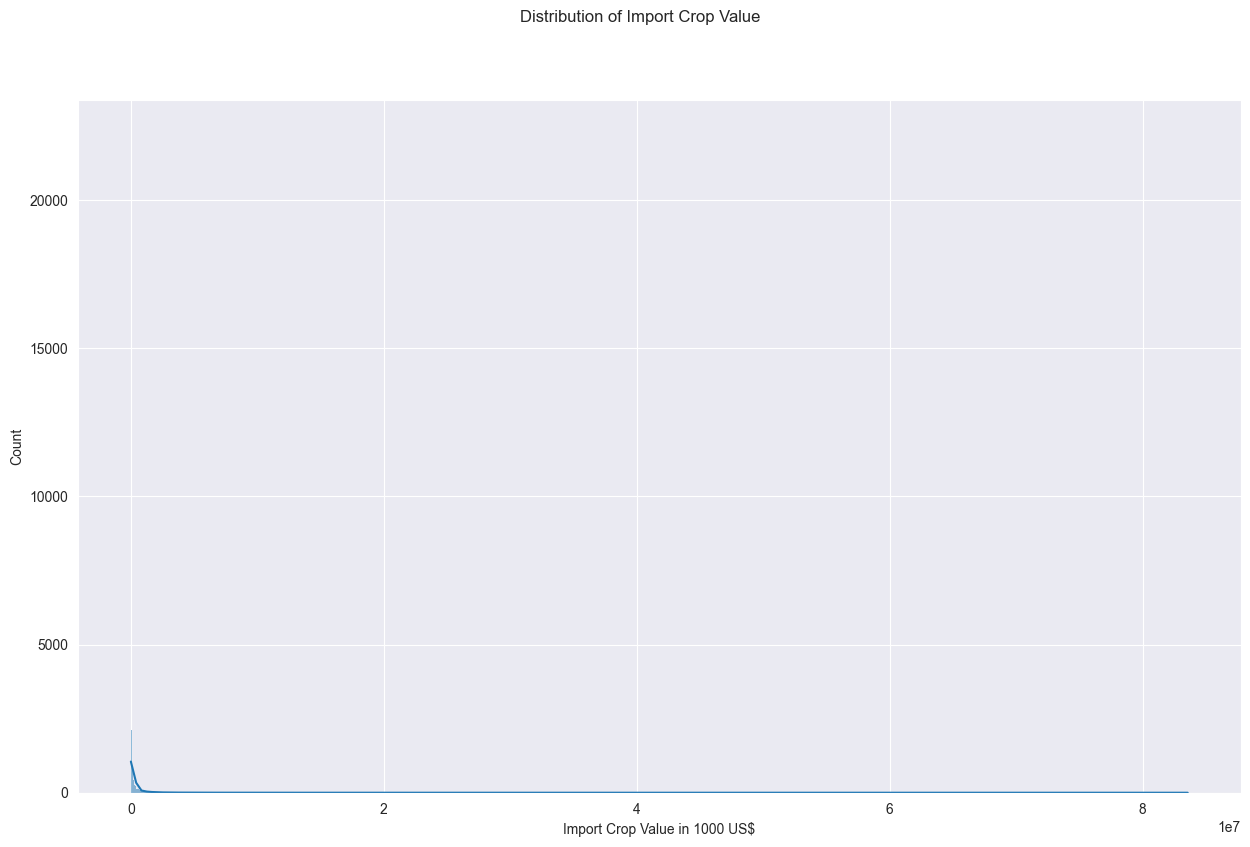

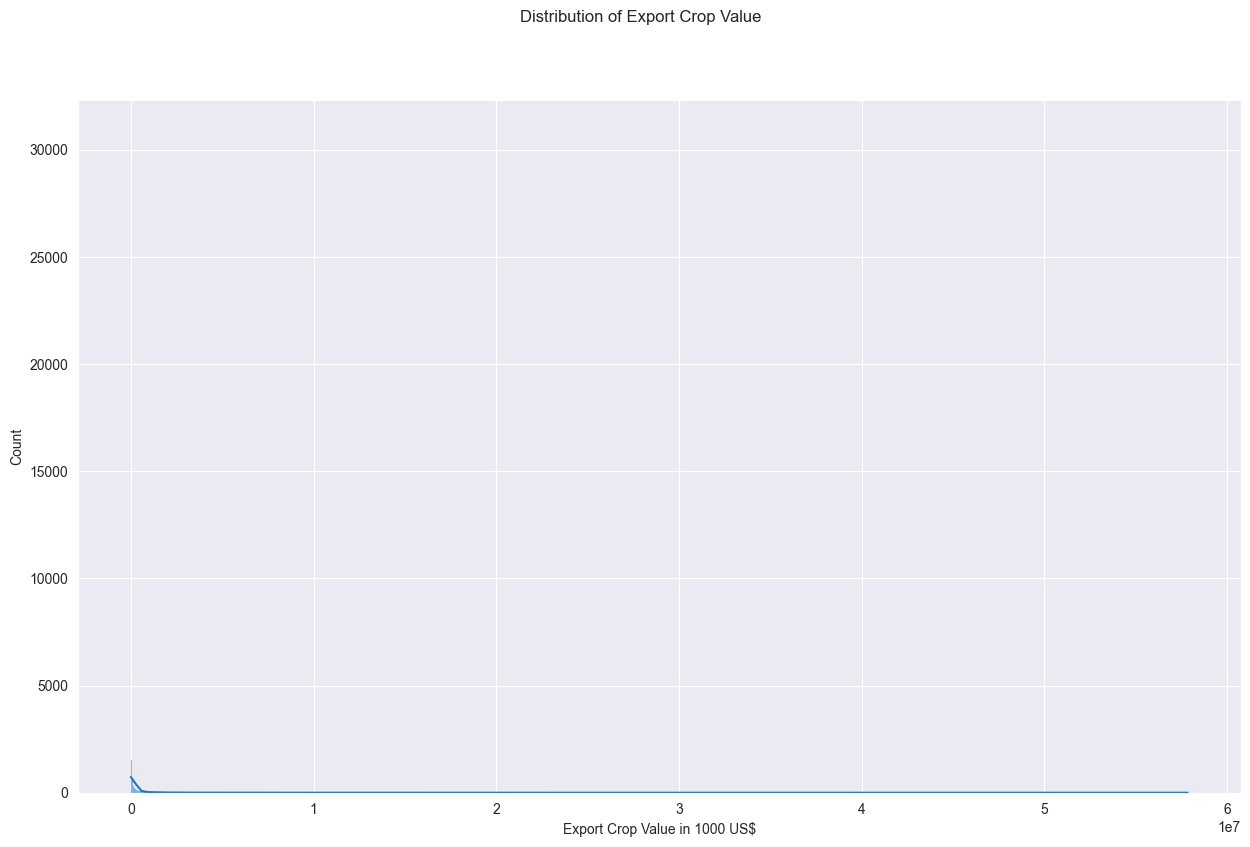

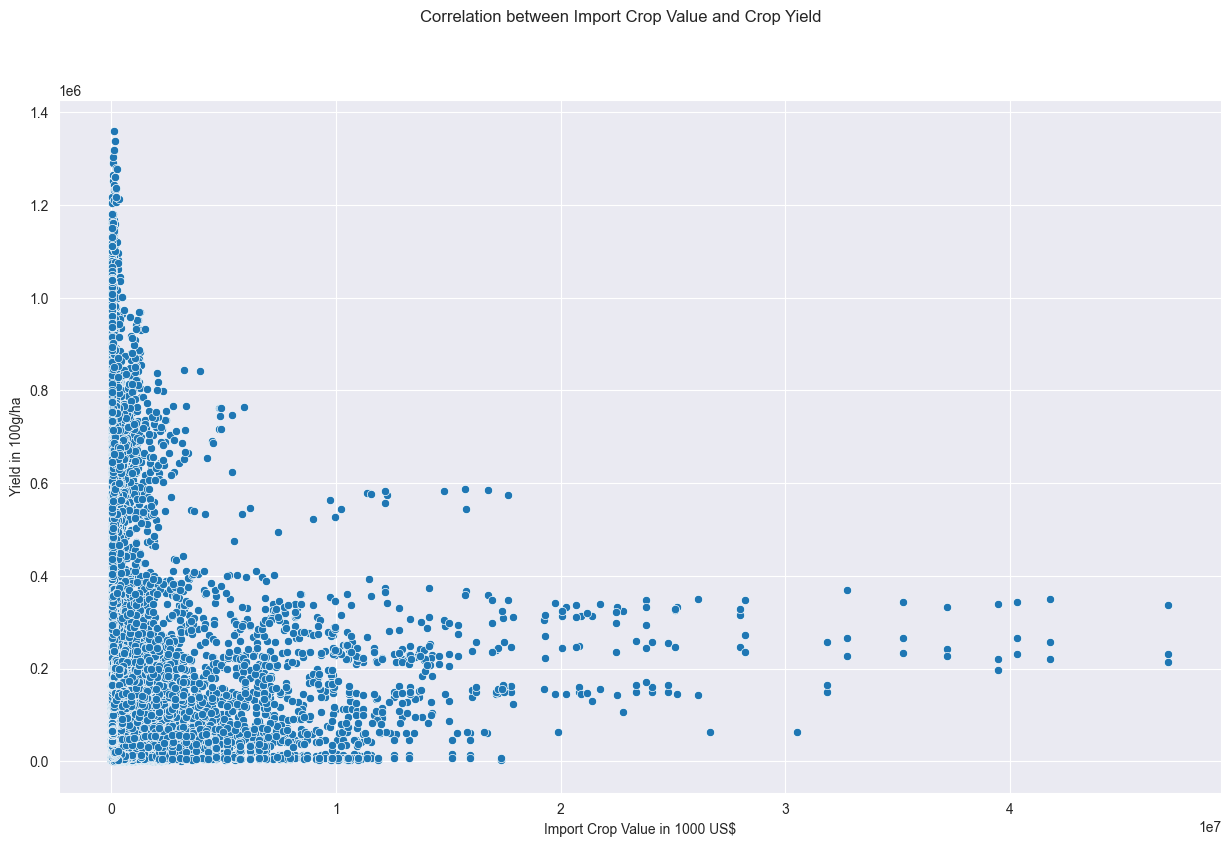

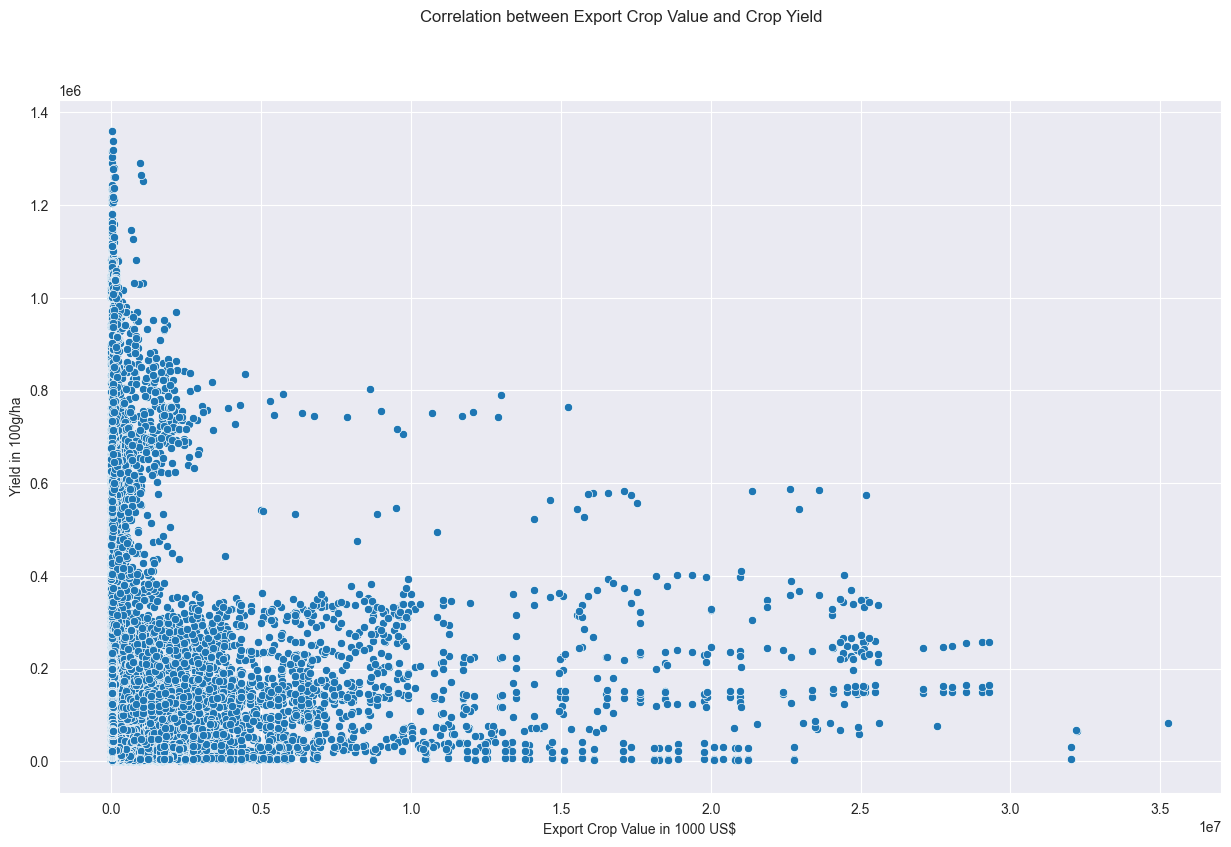

In [665]:
# Prepare the data for analysis
crop_value_exports_mean = crop_value_exports_df.groupby(['Year', 'Harmonised Item'])['Total Export Crop Value in 1000 US$'].mean()
crop_value_imports_mean = crop_value_imports_df.groupby(['Year', 'Harmonised Item'])['Total Import Crop Value in 1000 US$'].mean()

# Plot the mean import crop value over the years
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Mean Import Crop Value Over the Years for all Countries by Crop Type")

crop_value_imports_mean.unstack().plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Import Crop Value in 1000 US$")
plt.show()

# Plot the mean export crop value over the years
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Mean Export Crop Value Over the Years for all Countries by Crop Type")

crop_value_exports_mean.unstack().plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Export Crop Value in 1000 US$")
plt.show()

# Plot the distribution of import crop value
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Distribution of Import Crop Value")

sns.histplot(crop_value_imports_df['Total Import Crop Value in 1000 US$'], kde=True, ax=ax)
plt.xlabel("Import Crop Value in 1000 US$")
plt.show()

# Plot the distribution of export crop value
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Distribution of Export Crop Value")

sns.histplot(crop_value_exports_df['Total Export Crop Value in 1000 US$'], kde=True, ax=ax)
plt.xlabel("Export Crop Value in 1000 US$")
plt.show()

# Plot the correlation between import crop value and crop yield
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation between Import Crop Value and Crop Yield")

sns.scatterplot(data=merged_df, x='Total Import Crop Value in 1000 US$', y='Yield in 100g/ha', ax=ax)
plt.xlabel("Import Crop Value in 1000 US$")
plt.ylabel("Yield in 100g/ha")
plt.show()

# Plot the correlation between export crop value and crop yield
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation between Export Crop Value and Crop Yield")

sns.scatterplot(data=merged_df, x='Total Export Crop Value in 1000 US$', y='Yield in 100g/ha', ax=ax)
plt.xlabel("Export Crop Value in 1000 US$")
plt.ylabel("Yield in 100g/ha")
plt.show()